## Interacting with results from the VAST Pipeline

This notebook gives an example of how to use vast-tools in a notebook environment to interact with output from the VAST Pipeline (https://github.com/askap-vast/vast-pipeline).

Documentation for the pipeline is currently being written but there is a short Wiki page on the methods used here: https://github.com/askap-vast/vast-project/wiki/VAST-Pipeline-Methods-Description. If anything is unclear with the results don't hesistate in contacting the Pipeline development team.

### vaex
For large pipeline runs vast-tools makes use of `vaex` to load the measurements and measurement_pairs dataframes in an out-of-core context. `vaex` behaves differently to pandas but offers many advantages in handling large dataframes. See the documentation here: https://vaex.readthedocs.io/en/latest/index.html. If you use the built-in methods of the pipeline class then `vaex` will be taken care of behind the scenes such that users shouldn't have to worry about it. However be mindful when performing manual analysis using `vaex` dataframes. Warnings will appear when `vaex` has been used. Also note that `vaex` is a relatively young project so you may run into a bug or two when using it yourself.


### Imports
Below are the imports required for this example. The main import required from vast-tools is the Pipeline class. Astropy objects are also imported as well as bokeh as some plots use the bokeh library. Note that we initialise the bokeh function `output_notebook()` such that bokeh outputs are shown in the notebook environment. `matplotlib.pyplot` is also imported in case we want to manage any plots produced.

In [1]:
from vasttools.pipeline import Pipeline
from bokeh.io import output_notebook
from bokeh.plotting import show
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt

output_notebook()

Loading BokehJS ...

### Loading a Pipeline run

The first step is to initialise the Pipeline. If the environment variable `PIPELINE_WORKING_DIR` is defined then you do not need to provide the pipeline run directory. Otherwise, use the `project_dir` argument in the Pipeline initialisation to set the directory. Ask your admin if you are not sure where the pipeline directory is located.

In [2]:
pipe = Pipeline(project_dir='/Users/adam/GitHub/vast-pipeline/pipeline-runs/')

If you are unsure of the run name you want to load, you can use the `list_piperuns()` method to list all available runs.

In [3]:
pipe.list_piperuns()

['S190814bv',
 'VAST_0127-73A',
 'VAST_2118-06A']

For this example we will load the `VAST_2118-06A` run. To do this we call the `load_run()` method and save the run to `my_run`:

In [4]:
my_run = pipe.load_run('VAST_2118-06A')

It's also possible to load multiple runs as one object using:

```pipe.load_runs(['VAST_2118-06A', 'VAST_0127-73A'])```

If you have loaded two separately you can also merge one with the other by doing:

```my_run = my_run.combine_with_run(my_other_run)```

For the purposes of this example we will continue to use the single `VAST_2118-06A` run.

The pipeline object has loaded all the outputs and information of the pipeline run. You have access to the following dataframes:

1. `my_run.images` contains the information on the images used in the pipeline run.

In [5]:
my_run.images.head()

,band_id,skyreg_id,measurements_path,polarisation,name,path,noise_path,background_path,datetime,jd,...,beam_bmin,beam_bpa,rms_median,rms_min,rms_max,centre_ra,centre_dec,xtr_radius,frequency,bandwidth
id,,,,,,,,,,,,,,,,,,,,,
3,1,2,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118+00A.EPOCH01.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,2019-08-27 13:38:38.810000+00:00,2.458723e+06,...,0.003656,-49.187650,0.270237,0.185790,1.319099,319.652442,0.003076,6.724881,887.0,0.0
4,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH01.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,2019-08-27 18:52:00.556000+00:00,2.458723e+06,...,0.003261,-70.402943,0.267957,0.179847,1.726998,319.652258,-6.298900,6.740103,887.0,0.0
5,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH02.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,2019-10-30 10:11:56.913000+00:00,2.458787e+06,...,0.003160,75.375255,0.243300,0.163784,1.672402,319.652258,-6.298900,6.740103,887.0,0.0
6,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH03x.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,2019-10-29 13:39:33.996000+00:00,2.458786e+06,...,0.003052,-82.036874,0.248223,0.162059,2.286700,319.652258,-6.298900,6.740103,887.0,0.0
7,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH05x.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,2020-01-11 05:40:11.007000+00:00,2.458860e+06,...,0.003008,70.737592,0.252249,0.170839,1.824399,319.652258,-6.298900,6.740103,887.0,0.0


2. `my_run.sources` contains the information on the unique sources found in the pipeline run.

In [6]:
my_run.sources.head()

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,n_neighbour_dist,vs_max_int,vs_max_peak,m_abs_max_int,m_abs_max_peak,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
77299,321.972731,0.699851,1.191653,50.003472,50.003472,0.000283,0.000283,17.161000,14.401000,14.401,...,0.079768,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0
77300,323.714037,-2.603740,0.984136,35.623786,50.442724,0.000115,0.000115,14.835333,15.056000,16.293,...,0.067183,4.132788,1.632995,0.572105,0.131824,6,6,0,0,0
77301,322.061911,-3.652180,1.106793,28.950530,51.572954,0.000117,0.000117,11.282667,10.265667,14.492,...,0.048348,12.304239,18.271020,0.700438,0.623699,6,6,0,0,0
77302,316.331531,-2.608983,1.114564,52.407843,64.431111,0.000115,0.000115,15.655833,14.061667,14.497,...,0.072485,7.567780,3.348124,0.468742,0.081332,6,6,0,0,0
77303,323.795974,1.830176,1.067300,40.235955,40.235955,0.000284,0.000284,15.288000,14.324000,14.324,...,0.048551,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0


3. `my_run.measurements` contains the information on all of the measurements found in the pipeline run, both from selavy and forced (if used in the pipeline run). Measurements are the datapoints in time of a `source`, hence the source column tells you which source the measurement belongs to.

In [7]:
my_run.measurements.head()

,source,island_id,component_id,local_rms,ra,ra_err,dec,dec_err,flux_peak,flux_peak_err,...,compactness,ew_sys_err,ns_sys_err,error_radius,uncertainty_ew,uncertainty_ns,weight_ew,weight_ns,forced,id
0,77299,SB9667_island_1000,SB9667_component_1000a,0.288,321.972731,0.000038,0.699851,0.000035,14.401,0.299148,...,1.191653,0.000278,0.000278,0.000052,0.000283,0.000283,1.252459e+07,1.252459e+07,False,13122
1,86558,SB9667_island_1001,SB9667_component_1001a,0.246,317.111595,0.000038,0.539810,0.000039,14.155,0.265187,...,1.589756,0.000278,0.000278,0.000054,0.000283,0.000283,1.248288e+07,1.248288e+07,False,13123
2,85010,SB9667_island_1002,SB9667_component_1002a,0.275,322.974588,0.000040,1.790072,0.000053,14.823,0.297339,...,1.961614,0.000278,0.000278,0.000067,0.000286,0.000286,1.225484e+07,1.225484e+07,False,13124
3,83430,SB9667_island_1003,SB9667_component_1003a,0.327,315.077869,0.000046,3.011253,0.000037,14.526,0.332071,...,1.115517,0.000278,0.000278,0.000059,0.000284,0.000284,1.240757e+07,1.240757e+07,False,13125
4,92656,SB9667_island_1004,SB9667_component_1004a,0.300,315.567810,0.000035,-0.299919,0.000034,14.722,0.305109,...,1.074243,0.000278,0.000278,0.000049,0.000282,0.000282,1.256934e+07,1.256934e+07,False,13126


You also have access to: 
* `my_run.relations` which contains the relation information of the pipeline run, i.e. what source is related to another source.
* `my_run.skyregions` which contains the sky region information of the pipeline run.

You should rarely need to access these, but are there in case they are required.

### Looking at a specific source

We can load any source into a vast-tools source instance (like those used in other notebook examples) by using the `my_run.get_source(id)` function. The `id` is the same id as listed in the sources table. Below I load the source with the `id = 77300`.

In [8]:
my_source = my_run.get_source(77300)

All the normal functions are available (in the pipeline case, each datapoint is it's own epoch, e.g. to load the first datapoint you would load epoch `"1"`, note that all epochs are strings).

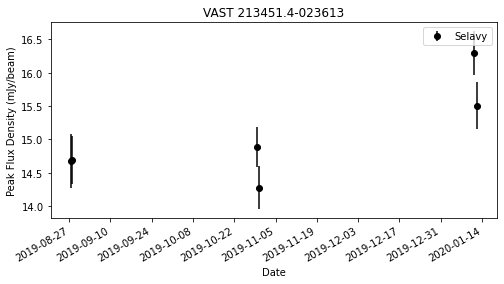

In [9]:
lc = my_source.plot_lightcurve()
lc

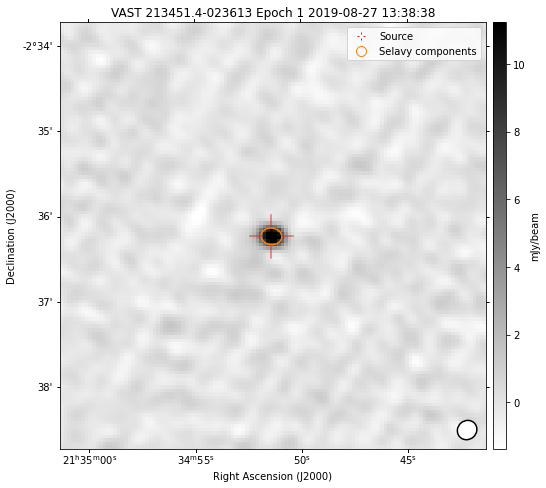

In [10]:
epoch1 = my_source.show_png_cutout("1")
epoch1

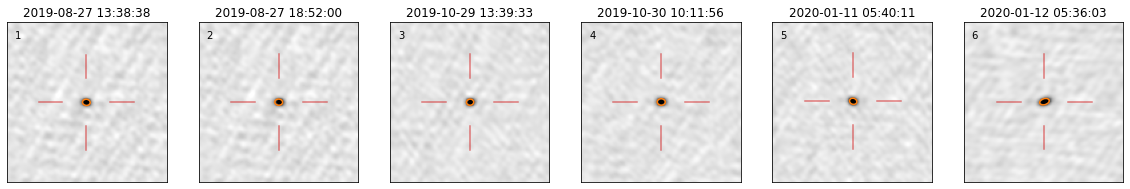

In [11]:
all_cutouts = my_source.show_all_png_cutouts(columns=6, figsize=(20,10))
all_cutouts

In [12]:
ned_results = my_source.ned_search()
ned_results

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,WISEA J213450.42-023602.4,323.71012,-2.60068,IrS,--,--,,,0.298,0,0,12,1,0,0,0
2,WISEA J213450.48-023617.2,323.71037,-2.60479,IrS,--,--,,,0.229,0,0,12,1,0,0,0
3,NVSS J213451-023611,323.713,-2.60325,RadioS,--,--,,1.03,0.069,0,0,1,1,0,0,0
4,WISEA J213451.99-023630.7,323.71665,-2.60856,IrS,--,--,,,0.329,0,0,12,1,0,0,0
5,WISEA J213452.05-023611.0,323.7169,-2.60306,IrS,--,--,,,0.176,0,0,12,1,0,0,0


## Performing transient and variable analysis

There are a couple of built-in analyses that you can perform on the data.

1. **Two-epoch analysis** (e.g. Mooley et al., 2016; https://ui.adsabs.harvard.edu/abs/2016ApJ...818..105M/abstract).
2. **eta-v sigma analysis** (e.g. Rowlinson et al., 2019; https://ui.adsabs.harvard.edu/abs/2019A%26C....27..111R/abstract; though no machine learning is used here, only sigma cuts).

For both searches we are going to perform some filtering on the sources to minimise false positives. This can be done by defining a string that will be passed to the `df.filter()` method of a dataframe:

In [13]:
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 "
    "& n_neighbour_dist > 1./60. "
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0"
    "& min_snr >= 7.0"
)

Here we are asking for sources that:

* have 3 or more measurements,
* are detected in selavy at least 2 times,
* are 1 arcmin away from their nearest neighbour,
* have an average compactness value (f_int / f_peak) between 0.8 and 1.4,
* have no relations.
* and have a minimum SNR greater of equal to 7 (this SNR metric relates to selavy detections)

**Note**: This is an example of cuts you may wish to make. Consider your own science goals when making the selections.

With this query string ready, two-epoch analysis will be the first example.

### Two-epoch analysis

The pipeline pre-calculates the two epoch metrics for us, so the first step is that we need to load the two epoch metrics dataframe into the job. This is a dataframe that contains all possible pairs of source measurements along with the calculated metrics. This is done by:

In [14]:
my_run.load_two_epoch_metrics()

The `measurement_pairs_df` is now availble in the run.

**Note** By default the `Vs` parameters are not stored as absolute values, but should be converted to absolute for any manual analysis you do. All the steps below automatically convert to absolute values.

In [15]:
my_run.measurement_pairs_df.head()

,meas_id_a,meas_id_b,flux_int_a,flux_int_err_a,flux_peak_a,flux_peak_err_a,image_name_a,flux_int_b,flux_int_err_b,flux_peak_b,flux_peak_err_b,image_name_b,vs_peak,vs_int,m_peak,m_int,source_id,id,pair_epoch_key
0,13135,28738,13.521,0.661287,14.677,0.401186,VAST_2118+00A.EPOCH01.I.fits,10.097000,0.499104,14.690000,0.355294,VAST_2118-06A.EPOCH01.I.fits,-0.024258,4.132788,-0.000885,0.289948,77300,384434,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...
1,13135,45432,13.521,0.661287,14.677,0.401186,VAST_2118+00A.EPOCH01.I.fits,12.546000,0.468151,14.890000,0.297806,VAST_2118-06A.EPOCH03x.I.fits,-0.426308,1.203368,-0.014408,0.074807,77300,384435,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...
2,13135,37141,13.521,0.661287,14.677,0.401186,VAST_2118+00A.EPOCH01.I.fits,18.188000,0.658433,14.278000,0.322105,VAST_2118-06A.EPOCH02.I.fits,0.775522,-5.001150,0.027560,-0.294364,77300,384436,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...
3,13135,53798,13.521,0.661287,14.677,0.401186,VAST_2118+00A.EPOCH01.I.fits,17.756001,0.604741,16.292999,0.329568,VAST_2118-06A.EPOCH05x.I.fits,-3.112497,-4.725985,-0.104359,-0.270806,77300,384437,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...
4,13135,61619,13.521,0.661287,14.677,0.401186,VAST_2118+00A.EPOCH01.I.fits,16.903999,0.642313,15.508000,0.349955,VAST_2118-06A.EPOCH06x.I.fits,-1.560941,-3.669665,-0.055060,-0.222383,77300,384438,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...


It also loads a `pairs_df` which contains information about all the unique epoch pairs possible in the pipeline run:

In [16]:
my_run.pairs_df.head()

,image_id_a,image_id_b,datetime_a,image_name_a,datetime_b,image_name_b,td,pair_epoch_key,total_pairs
id,,,,,,,,,
0,3,4,2019-08-27 13:38:38.810000+00:00,VAST_2118+00A.EPOCH01.I.fits,2019-08-27 18:52:00.556000+00:00,VAST_2118-06A.EPOCH01.I.fits,0 days 05:13:21.746000,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...,2968
9,6,5,2019-10-29 13:39:33.996000+00:00,VAST_2118-06A.EPOCH03x.I.fits,2019-10-30 10:11:56.913000+00:00,VAST_2118-06A.EPOCH02.I.fits,0 days 20:32:22.917000,VAST_2118-06A.EPOCH03x.I.fits_VAST_2118-06A.EP...,10614
14,7,8,2020-01-11 05:40:11.007000+00:00,VAST_2118-06A.EPOCH05x.I.fits,2020-01-12 05:36:03.834000+00:00,VAST_2118-06A.EPOCH06x.I.fits,0 days 23:55:52.827000,VAST_2118-06A.EPOCH05x.I.fits_VAST_2118-06A.EP...,10922
5,4,6,2019-08-27 18:52:00.556000+00:00,VAST_2118-06A.EPOCH01.I.fits,2019-10-29 13:39:33.996000+00:00,VAST_2118-06A.EPOCH03x.I.fits,62 days 18:47:33.440000,VAST_2118-06A.EPOCH01.I.fits_VAST_2118-06A.EPO...,10446
1,3,6,2019-08-27 13:38:38.810000+00:00,VAST_2118+00A.EPOCH01.I.fits,2019-10-29 13:39:33.996000+00:00,VAST_2118-06A.EPOCH03x.I.fits,63 days 00:00:55.186000,VAST_2118+00A.EPOCH01.I.fits_VAST_2118-06A.EPO...,2965


With these dataframes now loaded into the run, it is now possible to perform the analysis.

This is performed by using the method `run_two_epoch_analysis`, which returns a dataframe containing source candidates and a dataframe of the pairs that meet the metrics thresholds that are set when running. I.e. if a source has a pair that meet the `Vs` and `|m|` thresholds, it is a candidate. For this we are using the values of V=4.3 and m=0.26 (refer to the Mooley et al. paper).

We also pass in the query string that was set up previously which allows the pool of measurements to be pre-filtered.

In [17]:
two_epoch_candidates_df, two_epoch_pairs_df = my_run.run_two_epoch_analysis(4.3, 0.26, query=my_query_string)

Pairs shows the unique epoch pairs and their time delta:

The returned sources are variable candidates according to the thresholds set:

In [18]:
two_epoch_candidates_df.head()

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,n_neighbour_dist,vs_max_int,vs_max_peak,m_abs_max_int,m_abs_max_peak,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
77301,322.061911,-3.652180,1.106793,28.950530,51.572954,0.000117,0.000117,11.282667,10.265667,14.492,...,0.048348,12.304239,18.271020,0.700438,0.623699,6,6,0,0,0
77502,323.100608,-1.605225,0.986725,10.717791,21.736264,0.000128,0.000128,4.657500,4.695000,5.934,...,0.022470,4.605859,5.539529,0.799510,0.517607,6,6,0,0,0
77606,323.101509,-3.234672,1.103508,12.436214,29.625000,0.000129,0.000129,5.191500,4.571000,6.399,...,0.072500,3.958932,6.515245,1.074200,0.716909,6,6,0,0,0
78022,322.271740,-1.717227,1.054355,34.362369,49.572816,0.000116,0.000116,12.951333,12.480333,15.318,...,0.048778,9.114620,14.046836,0.526036,0.435101,6,6,0,0,0
78042,322.989827,-8.163247,1.043703,35.470803,56.774590,0.000127,0.000127,12.447200,11.883600,13.853,...,0.034946,8.386250,11.167866,0.475746,0.350755,5,5,0,0,0


We can see if any sources are marked as `new` and sort by the `m_abs_max_peak` (largest first):

In [19]:
two_epoch_candidates_df[two_epoch_candidates_df.new == True].sort_values(by='m_abs_max_peak', ascending=False)

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,n_neighbour_dist,vs_max_int,vs_max_peak,m_abs_max_int,m_abs_max_peak,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
94112,322.437443,-4.484941,1.258322,12.385542,25.690647,0.000066,0.000066,2.122960,1.697460,7.142,...,0.086553,13.181047,15.010525,16.191414,16.191414,6,2,4,0,0
91021,321.551610,-9.186384,1.076647,7.398754,10.446309,0.000077,0.000077,1.555463,1.470463,3.113,...,0.084307,3.938529,4.468215,1.712975,1.691109,5,2,3,0,0


Let's check the first one:

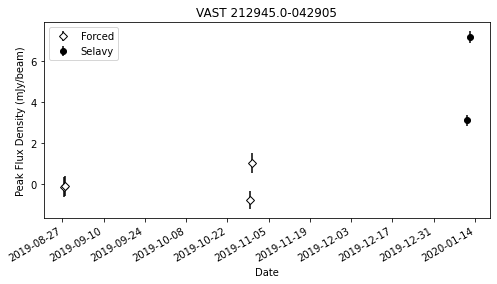

In [20]:
candidate_source = my_run.get_source(94112)
lc = candidate_source.plot_lightcurve()
lc

In [21]:
candidate_source.simbad_search()

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,RA_d,DEC_d
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,deg,deg
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float64
CRTS J212945.0-042906,21 29 45.0466,-04 29 06.973,14,14,0.080,0.082,90,A,O,2018yCat.1345....0G,322.43769431,-4.48527042
PSR J2129-04,21 29 45.29,-04 29 11.9,6,6,--,--,0,D,,2014ApJ...795...72L,322.43871000,-4.48664000


It's `PSR J2129-04`!

#### Plotting two epoch metrics

You are also able to plot the metrics for a speceific epoch pair, i.e. two images containing the same sources. To pick an epoch you can use the `pairs_df`, which also contains `total_pairs` which I'll use to sort here to pick the epoch with the most pairs.

In [22]:
my_run.pairs_df.sort_values(by='total_pairs', ascending=False).head()

,image_id_a,image_id_b,datetime_a,image_name_a,datetime_b,image_name_b,td,pair_epoch_key,total_pairs
id,,,,,,,,,
14,7,8,2020-01-11 05:40:11.007000+00:00,VAST_2118-06A.EPOCH05x.I.fits,2020-01-12 05:36:03.834000+00:00,VAST_2118-06A.EPOCH06x.I.fits,0 days 23:55:52.827000,VAST_2118-06A.EPOCH05x.I.fits_VAST_2118-06A.EP...,10922
13,5,8,2019-10-30 10:11:56.913000+00:00,VAST_2118-06A.EPOCH02.I.fits,2020-01-12 05:36:03.834000+00:00,VAST_2118-06A.EPOCH06x.I.fits,73 days 19:24:06.921000,VAST_2118-06A.EPOCH02.I.fits_VAST_2118-06A.EPO...,10793
11,6,8,2019-10-29 13:39:33.996000+00:00,VAST_2118-06A.EPOCH03x.I.fits,2020-01-12 05:36:03.834000+00:00,VAST_2118-06A.EPOCH06x.I.fits,74 days 15:56:29.838000,VAST_2118-06A.EPOCH03x.I.fits_VAST_2118-06A.EP...,10737
12,5,7,2019-10-30 10:11:56.913000+00:00,VAST_2118-06A.EPOCH02.I.fits,2020-01-11 05:40:11.007000+00:00,VAST_2118-06A.EPOCH05x.I.fits,72 days 19:28:14.094000,VAST_2118-06A.EPOCH02.I.fits_VAST_2118-06A.EPO...,10616
9,6,5,2019-10-29 13:39:33.996000+00:00,VAST_2118-06A.EPOCH03x.I.fits,2019-10-30 10:11:56.913000+00:00,VAST_2118-06A.EPOCH02.I.fits,0 days 20:32:22.917000,VAST_2118-06A.EPOCH03x.I.fits_VAST_2118-06A.EP...,10614


We'll use the `id` of the epoch (in this case `14`) to create the plot and we'll also pass in the query string. By default it returns a `bokeh` plot, which we will use the `show` function imported at the beginning.

In [23]:
two_epoch_plot = my_run.plot_two_epoch_pairs(14, query=my_query_string)
show(two_epoch_plot)

There is also an option to plot using matplotlib.

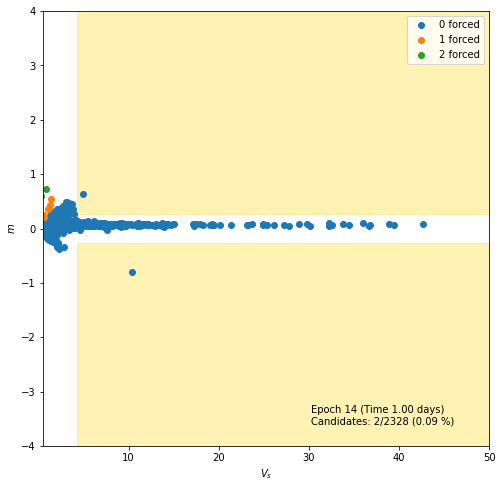

In [24]:
two_epoch_plot_plt = my_run.plot_two_epoch_pairs(14, query=my_query_string, plot_type='matplotlib')
two_epoch_plot_plt

Remember that you can change aspects of the returned matplotlib figure by fetching the axes:

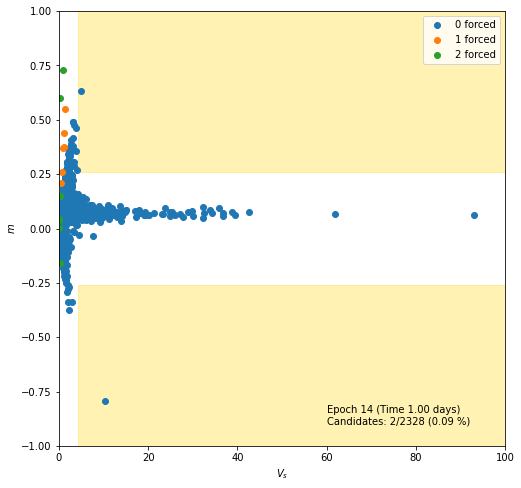

In [25]:
two_epoch_plot_plt.axes[0].set_ylim([-1, 1])
two_epoch_plot_plt.axes[0].set_xlim([0, 100])
two_epoch_plot_plt

The plotting of two epochs only supports one 'epoch' at a time but feel free to create your own plot if you require.

### The eta-v analysis

Now we'll also run the eta-v analysis. This is called by the `my_run.run_eta_v_analysis()`. We will use the same query string as before (copied again here for clarity, but you wouldn't need to re-define it):

In [26]:
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 "
    "& n_neighbour_dist > 1./60. "
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0 "
    "& min_snr > 7.0"
)

Now we run the analysis, using the `run_eta_v_analysis` function, where we use `1 sigma` as the threshold value to select candidates. It returns the eta and v threshold values (see Rowlinson et al. paper), a dataframe of candidate sources and a plot for visualisation.

In [27]:
eta_thresh, v_thresh, eta_v_candidates, plot = my_run.run_eta_v_analysis(1.0, 1.0, query=my_query_string)
print(eta_thresh, v_thresh)

5.18987581235727 0.11009961237313104


View the plot from the analysis. The datapoints are colour coded to represent the number of selavy (i.e actual) detections.

In [28]:
# use the bokeh `show` function imported at the beginning.
show(plot)

For the purposes of the example lets run the analysis again this time fetching a matplotlib plot and the diagnostic plot.

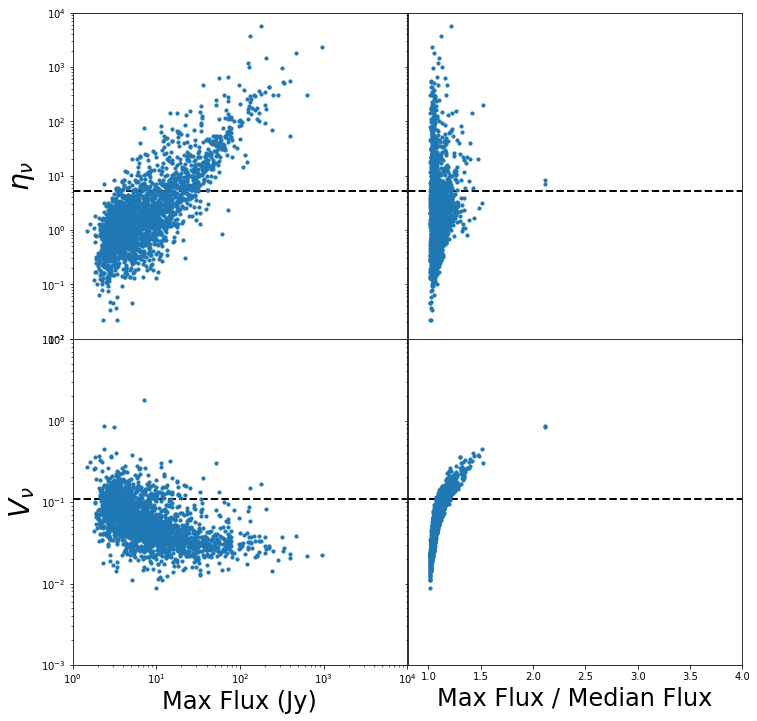

In [29]:
eta_thresh, v_thresh, eta_v_candidates, plot, diag_plot = my_run.run_eta_v_analysis(1.0, 1.0, query=my_query_string, plot_type='matplotlib', diagnostic=True)
diag_plot

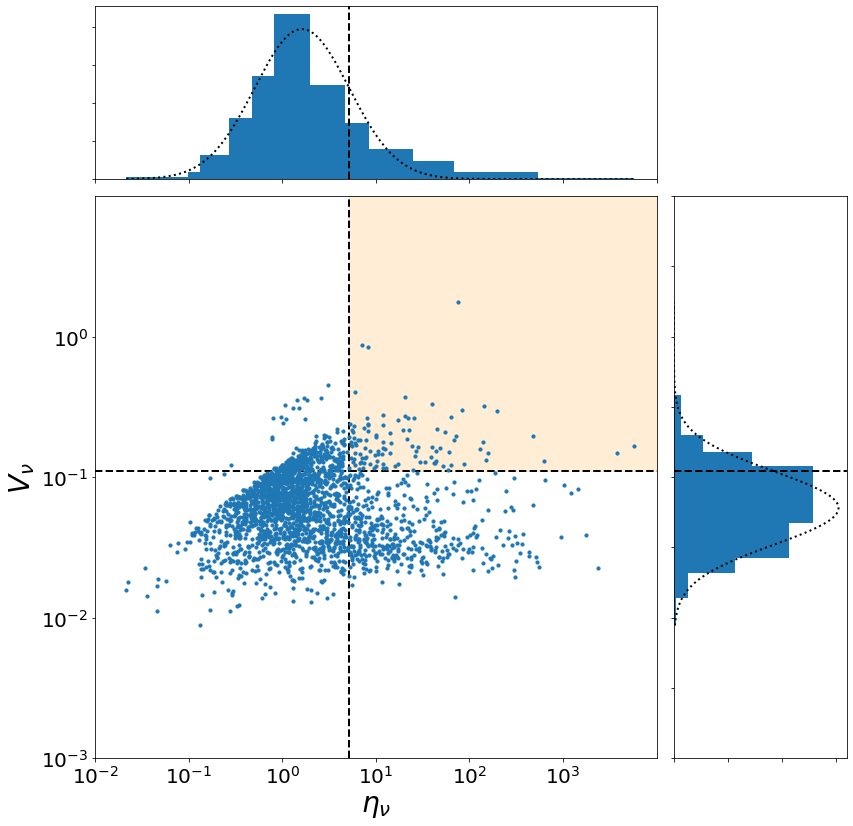

In [30]:
plot

By looking at the plot above, there is one source that is clearly beyond the 1 sigma threshold in both metrics. If you hover over the point in the bokeh plot you'll see it is source `94112` - `PSR J2129-04`.

The other 105 candidates can be explored using the candidates dataframe returned by the analysis:

In [31]:
eta_v_candidates

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,n_neighbour_dist,vs_max_int,vs_max_peak,m_abs_max_int,m_abs_max_peak,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
77301,322.061911,-3.652180,1.106793,28.950530,51.572954,0.000117,0.000117,11.282667,10.265667,14.492,...,0.048348,12.304239,18.271020,0.700438,0.623699,6,6,0,0,0
77502,323.100608,-1.605225,0.986725,10.717791,21.736264,0.000128,0.000128,4.657500,4.695000,5.934,...,0.022470,4.605859,5.539529,0.799510,0.517607,6,6,0,0,0
77580,321.114513,-3.477695,1.076348,13.439216,23.482213,0.000131,0.000131,4.579833,4.243167,5.941,...,0.030201,1.622512,1.096972,0.682922,0.539974,6,6,0,0,0
77606,323.101509,-3.234672,1.103508,12.436214,29.625000,0.000129,0.000129,5.191500,4.571000,6.399,...,0.072500,3.958932,6.515245,1.074200,0.716909,6,6,0,0,0
78022,322.271740,-1.717227,1.054355,34.362369,49.572816,0.000116,0.000116,12.951333,12.480333,15.318,...,0.048778,9.114620,14.046836,0.526036,0.435101,6,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93486,317.200049,-9.141695,1.190500,11.611111,17.937500,0.000151,0.000151,5.315600,4.529400,5.268,...,0.051539,1.509344,3.398563,0.244484,0.354413,5,5,0,0,0
93529,316.778386,-7.517219,1.162530,15.073643,24.506550,0.000138,0.000138,5.587600,4.842000,5.612,...,0.059558,0.553197,1.996879,0.266045,0.362699,5,5,0,0,0
93566,321.575611,-4.855334,1.216177,8.897810,16.434783,0.000159,0.000159,3.850600,3.299600,4.158,...,0.030098,1.099750,4.433068,0.224457,0.521528,5,5,0,0,0


### Creating a MOC of the Pipeline Job

**WARNING** Beware of creating a MOC for a large pipeline run as it can take a very long time to complete. If you are using the VAST Pilot Survey data then load the MOCS directly from `VASTMOCS`.

There is also the ability to create a MOC file of the pipeline job. This can be useful to see the area and to also use the MOC to get pre-filtered surveys to crossmatch with (see the catalogue crossmatching example notebook).

For the MOC demo we'll use two runs:

In [32]:
my_two_runs = pipe.load_runs(['VAST_2118-06A', 'VAST_0127-73A'])

The MOC is created by calling the following (it may take a few seconds, or minutes for large runs):

In [33]:
my_two_runs_moc = my_two_runs.create_moc()

We can then plot the MOC as demonstrated in the other notebook examples (and in the mocpy documentation).

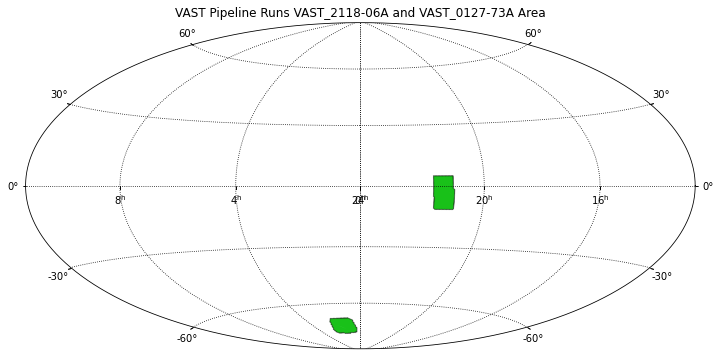

In [34]:
from mocpy import World2ScreenMPL
from astropy.visualization.wcsaxes.frame import EllipticalFrame

fig = plt.figure(figsize=(12,6))

with World2ScreenMPL(
    fig,
    fov=320 * u.deg,
    center=SkyCoord(0,0, unit='deg', frame='icrs'),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
) as wcs:
    ax = fig.add_subplot(111, projection=wcs, frame_class=EllipticalFrame)
    ax.set_title("VAST Pipeline Runs VAST_2118-06A and VAST_0127-73A Area")
    ax.grid(color="black", linestyle="dotted")
    my_two_runs_moc.fill(ax=ax, wcs=wcs, alpha=0.9, fill=True, linewidth=0, color="#00bb00")
    my_two_runs_moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
        
fig